Code to get ARP

In [1]:
import pandas as pd
import numpy as np

In [2]:
inBounds = pd.read_csv("CountInCityBounds.csv")

In [3]:
rows = int(inBounds['row_index'].max() + 1)
cols = int(inBounds['col_index'].max() + 1)

In [4]:
data = pd.read_csv("testCountNonfatalOnRoute.csv")
data2 = pd.read_csv("testCountFatalOnRoute.csv")

In [5]:
gridCrashCount = []
gridARP = []
gridARPNeg = []
gridARPPos = []
for i in range(rows):
    gridCrashCount.append([])
    gridARP.append([])
    gridARPPos.append([])
    gridARPNeg.append([])

In [6]:
for i in range(rows):
    for j in range(cols):
        if (int(inBounds[(inBounds.row_index == i) & (inBounds.col_index == j)].NUMPOINTS.iloc[0]) == 0):
            gridCrashCount[i].append(-1)
        else:
            gridCrashCount[i].append(int(data[(data.row_index == i) & (data.col_index == j)].NUMPOINTS.iloc[0]) + int(data2[(data2.row_index == i) & (data2.col_index == j)].NUMPOINTS.iloc[0]))

In [7]:
#squareErrors = []
for i in range(rows):
    for j in range(cols):
        if (gridCrashCount[i][j] == -1):
            gridARP[i].append(-100)
            gridARPNeg[i].append(-100)
            gridARPPos[i].append(-100)
        else:
            neighbors = []
            # check all neighbors
            for a in range(-1, 1):
                for b in range(-1, 1):
                    # does neighbor exist, exclude current tile
                    if ((gridCrashCount[i+a][j+b] >= 0) and ((a!=0) or (b!=0))):
                        neighbors.append(gridCrashCount[i+a][j+b])
            # if no neighbors
            if (len(neighbors) == 0):
                estimate = gridCrashCount[i][j]
            else:
                expected = np.average(neighbors)
                # divide by 0 handling
                if (expected == 0):
                    weight = 0
                else:
                    variance = np.var(neighbors)
                    weight = expected / (expected + variance)
                
                estimate = (weight * expected) + (gridCrashCount[i][j] * (1 - weight))
            gridARP[i].append(gridCrashCount[i][j] - estimate)
            if (gridCrashCount[i][j] - estimate) < 0:
                gridARPNeg[i].append(estimate - gridCrashCount[i][j])
                gridARPPos[i].append(0)
            else:
                gridARPPos[i].append(gridCrashCount[i][j] - estimate)
                gridARPNeg[i].append(0)
        #squareErrors.append((estimate - gridCrashCount[i][j])**2)

In [8]:
#mse = np.average(squareErrors)

In [9]:
temp = np.asmatrix(gridARP)
tempNeg = np.asmatrix(gridARPNeg)
tempPos = np.asmatrix(gridARPPos)
#np.savetxt("fatalEB.csv", temp, delimiter=",", fmt="%.4f")

In [10]:
#print("Mean Square Error: " + str(mse))

In [11]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import matplotlib
import matplotlib.pyplot as plt

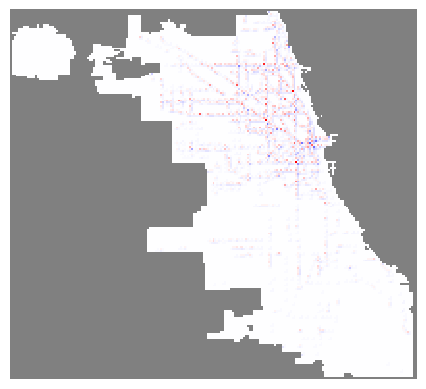

In [13]:
fig, ax = plt.subplots()
cmap=plt.cm.bwr
cmap.set_under('gray')
plt.axis('off')
ax.matshow(temp, cmap=cmap, vmin=-10, vmax=10)
ax.grid()

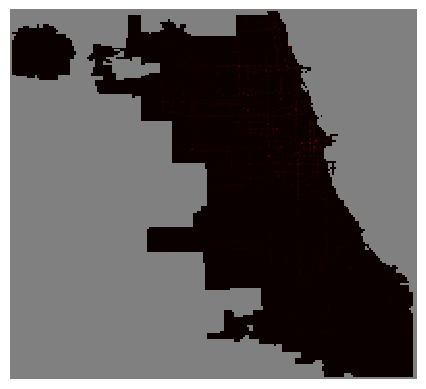

In [17]:
fig, ax = plt.subplots()
cmap=plt.cm.hot
cmap.set_under('gray')
plt.axis('off')
ax.matshow(tempNeg, cmap=cmap, vmin=0, vmax=50)
ax.grid()

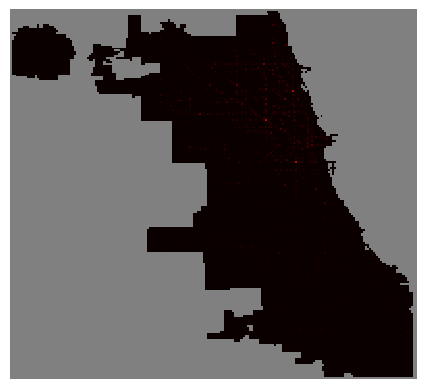

In [16]:
fig, ax = plt.subplots()
cmap=plt.cm.hot
cmap.set_under('gray')
plt.axis('off')
ax.matshow(tempPos, cmap=cmap, vmin=0, vmax=50)
ax.grid()